# LSTM (Long Short Term Memory)

### introduction

> Problems with RNN

- gradient Vanishing Problem in RNNs

- occurs during backpropagation through time (BPTT): gradients are calculated and propagated backward across time steps in an RNN.

- as gradients move backward through many layers, they often become smaller.

- gradients are multiplied by the weights at each time step, and if these weights are small or close to 1, the gradients shrink exponentially.

- gradients vanish and the network struggles to update the weights for earlier layers, making it difficult to learn long-term dependencies.

- rnn are good in solving prpbelem where the contex window is too small.

- but when context window get big it fail to give right answers.

> LSTMs

- lstms solve the gradient vashing and gradient exploding problems.(rnn suffers these problems)

- it introduces gating mechanisms (input gate, forget gate, output gate) to control the flow of information

- these gates allow the network to selectively remember or forget information over long sequences

- LSTMs can capture long-term dependencies more effectively than traditional RNNs

- they are widely used in various sequence modeling tasks like language modeling, machine translation, and speech recognition


### the core idea behind the lstsm.

- it was designed to solve the long dependency problem.

- it solve with horizontal line shown in below image 

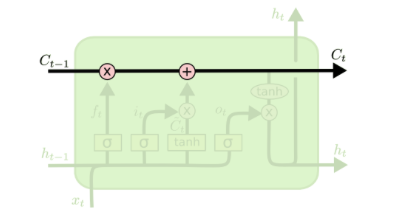


- it helps in maintaining the context of over the chain of lstm cells.
- this solve the gradient exploding and vanishing problem too. 

### how they work internally ?
 
1. input gate: decides which takes the input for cell
   - uses sigmoid activation to output values between 0 and 1
   - decides which values to update

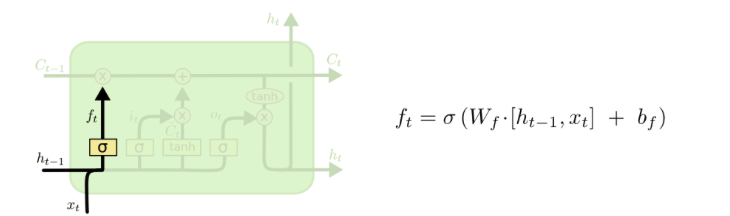


2. forget gate: decides what informantion should get removed from the cell 
    - also uses sigmoid activation
    - outputs values close to 0 (forget) or 1 (keep)

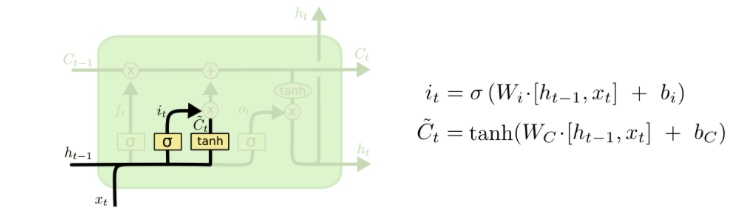

3. cell state update: combines the forget gate and input gate outputs
   - multiplies the old cell state by the forget gate output
   - adds the input gate output multiplied by a candidate cell state

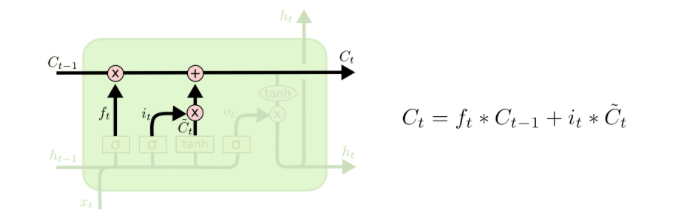

4. output gate: 
   - uses sigmoid activation
   - filters the updated cell state to produce the final output
   - the cell state is passed through a tanh function and multiplied by the output gate

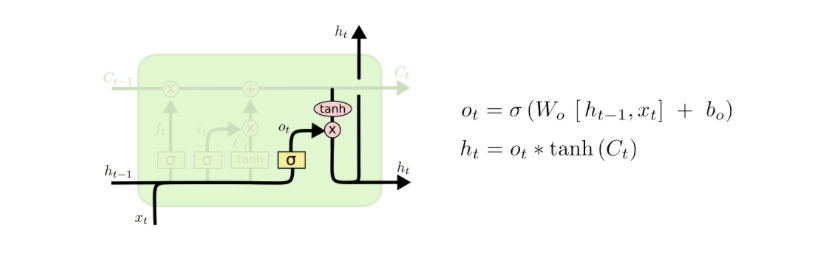

this architecture allows LSTMs to maintain relevant information over long sequences,
selectively update or forget information, and produce relevant outputs at each time step.

### Limitation of LSTMs

- it can be computationally expensive due to the complex gating mechanisms -> longer training times.

- it may struggle with very long sequences, especially when compared to more recent models like Transformers, which handle long-range dependencies more efficiently.

-  LSTMs require more memory and are harder to parallelize, making them less suitable for some large-scale tasks.


In [3]:
## LSTM from scratch in python 


import numpy as np

class LSTM:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Initialize weights and biases
        self.Wf = np.random.randn(hidden_size, input_size + hidden_size) # forget gate
        self.bf = np.zeros((hidden_size, 1))
        
        self.Wi = np.random.randn(hidden_size, input_size + hidden_size) # input gate
        self.bi = np.zeros((hidden_size, 1))
        
        self.Wc = np.random.randn(hidden_size, input_size + hidden_size) # candidate cell state
        self.bc = np.zeros((hidden_size, 1))
        
        self.Wo = np.random.randn(hidden_size, input_size + hidden_size) # output gate
        self.bo = np.zeros((hidden_size, 1))
        
        self.Wy = np.random.randn(input_size, hidden_size) # output layer
        self.by = np.zeros((input_size, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x, h_prev, c_prev):
        # concatenate input and previous hidden state
        z = np.row_stack((h_prev, x))
        
        # forget gate
        f = self.sigmoid(np.dot(self.Wf, z) + self.bf)
        
        # input gate
        i = self.sigmoid(np.dot(self.Wi, z) + self.bi)
        
        # candidate cell state
        c_tilde = np.tanh(np.dot(self.Wc, z) + self.bc)
        
        # cell state
        c = f * c_prev + i * c_tilde
        
        # output gate
        o = self.sigmoid(np.dot(self.Wo, z) + self.bo)
        
        # hidden state
        h = o * np.tanh(c)
        
        # output
        y = np.dot(self.Wy, h) + self.by
        
        return y, h, c

    def forward_sequence(self, x_sequence):
        h = np.zeros((self.hidden_size, 1))
        c = np.zeros((self.hidden_size, 1))
        outputs = []
        
        for x in x_sequence:
            y, h, c = self.forward(x, h, c)
            outputs.append(y)
        
        return np.array(outputs)


input_size = 10
hidden_size = 20
sequence_length = 5

lstm = LSTM(input_size, hidden_size)


x_sequence = np.random.randn(sequence_length, input_size, 1)


outputs = lstm.forward_sequence(x_sequence)

print("output -> ", outputs.shape)


output ->  (5, 10, 1)


# Lets take a short look at LSTM's Variant GRU 

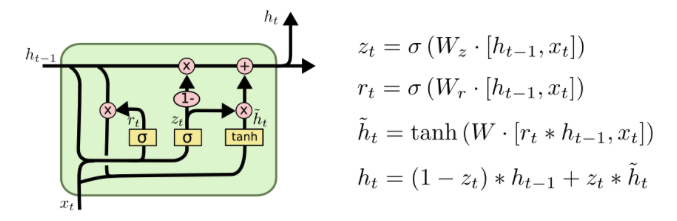

- combines the forget and input gates into a single update gate.

- two gates: uses an update gate and a reset gate to control the flow of information.

- update gate: decides how much of the past information to keep and how much to update with new information.

- reset gate: controls how much of the past information to forget.

- faster and less complex: GRUs are computationally more efficient than LSTMs while still handling long-term dependencies well.

# Conclusion 

- LSTMs and RNNs break the ice for text data cause ann failed pretty badly at text data.

- if u look at the flow how rnn failed at long dependencies and then lstm came to solve and lstm failed at very long context window and then new models come to solve.(attention mechanism)


